# Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors. We start with the typical imports:


In [1]:
!pip install matplotlib
!Pip install seaborn

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
#import datetools from pandas

# https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

In [2]:
# Create some data

rng = np.random.RandomState(0) # RandomState exposes a number of methods for generating random numbers drawn 
                               # from a variety of probability distributions.
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0) # Return the cumulative sum of the elements along a given axis.

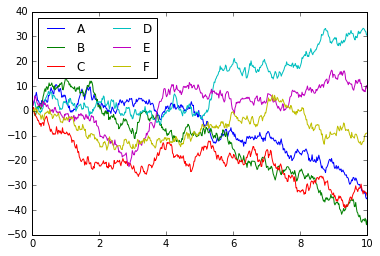

In [3]:
# Plot the data with mathplotlib default
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [4]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set()

##### Now let's rerun the sample two lines as before

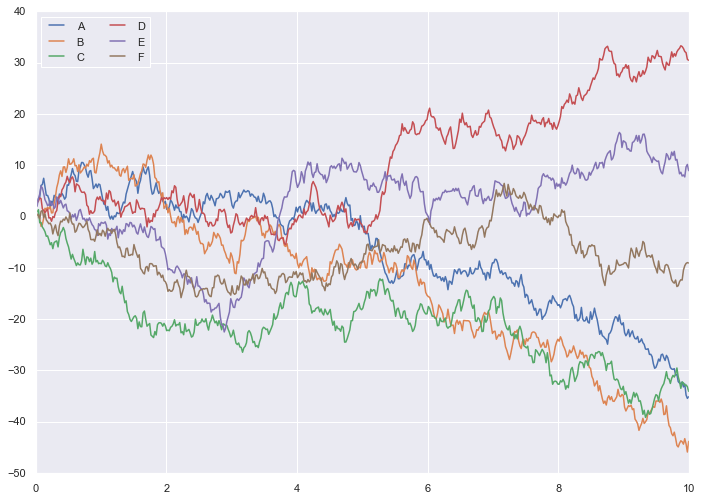

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

# Exploring Seaborn Plots

## Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. 

We have seen that this is relatively straightforward in Matplotlib

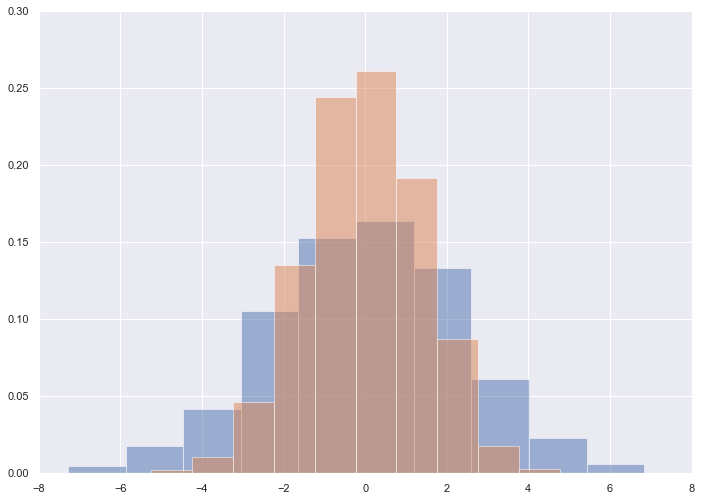

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, 
        stacked=True,
             alpha=0.5)



Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with 

        sns.kdeplot:

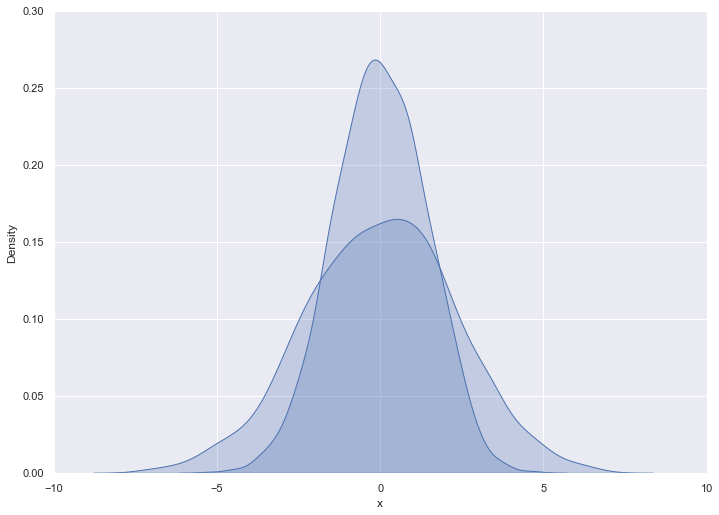

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE combinedusing:
        
        distplot

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


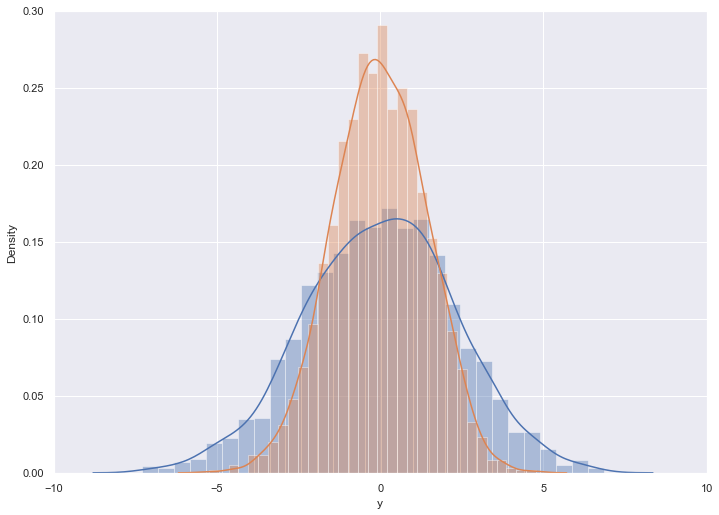

In [8]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


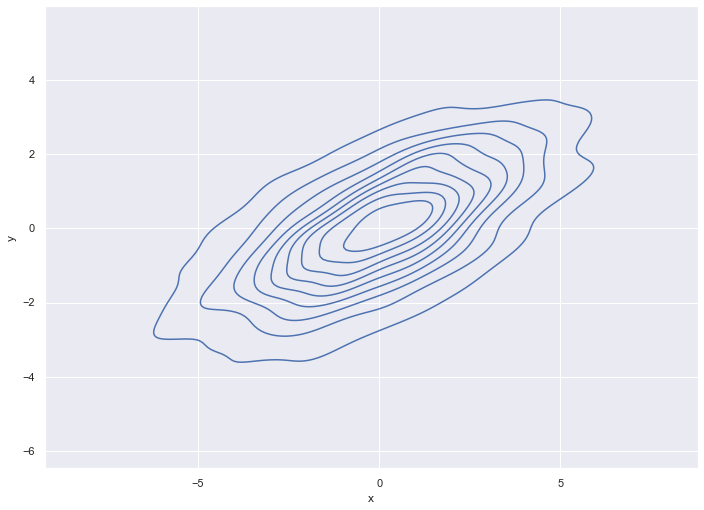

In [9]:
sns.kdeplot(data.x, data.y);

We can see the joint distribution and the marginal distributions together using 

    sns.jointplot. 
    
For this plot, we'll set the style to a white background:

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


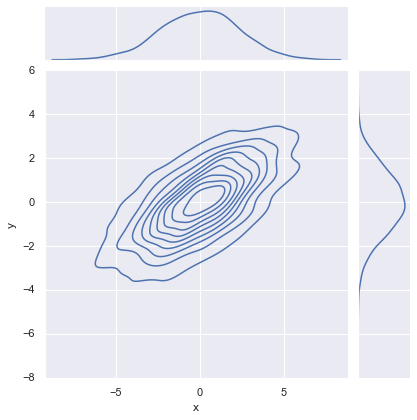

In [10]:
with sns.axes_style('darkgrid'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters that can be passed to 

        jointplot


—for example, we can use a hexagonally based histogram instead:

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


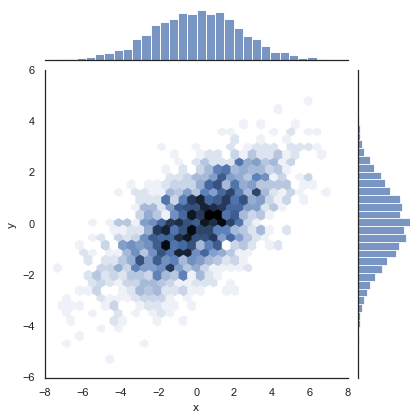

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

In [12]:
# Iris dataset, a lists measurements of petals and sepals of three iris species.

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling 

    sns.pairplot:

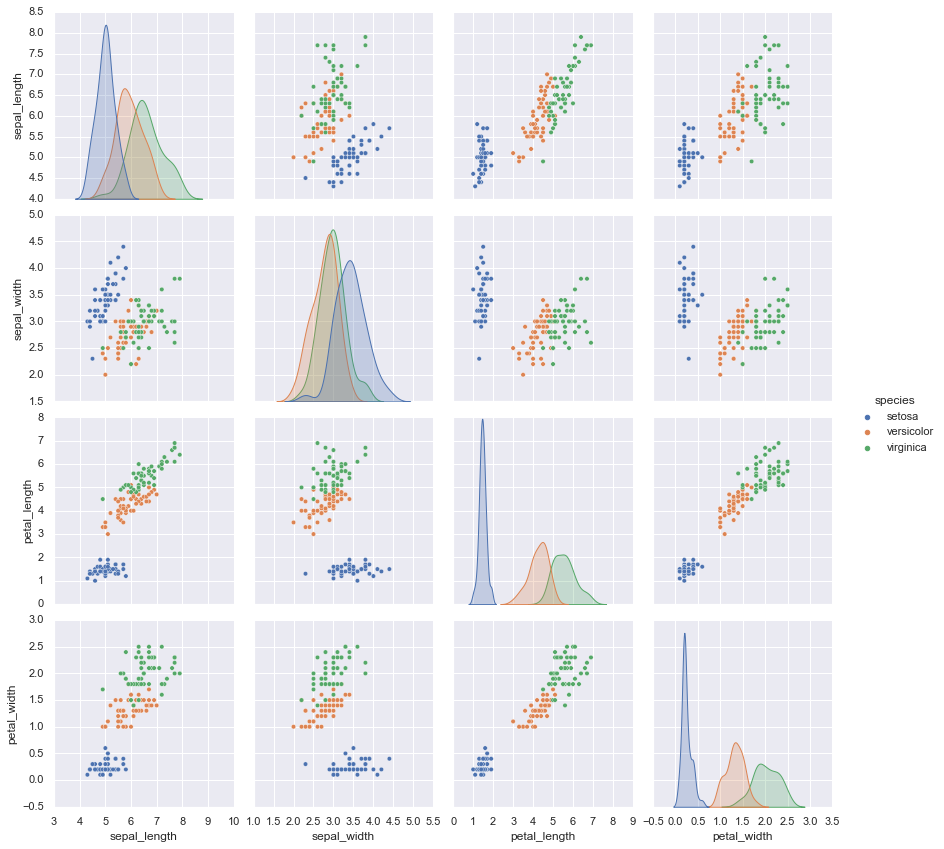

In [13]:
sns.pairplot(iris, hue='species', height=3)

## Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's 

       FacetGrid 

makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


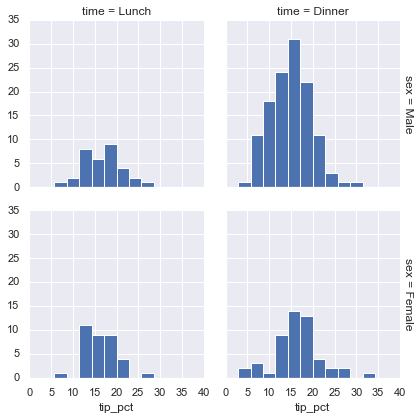

In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist,"tip_pct", bins=np.linspace(0, 40, 15));

## Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


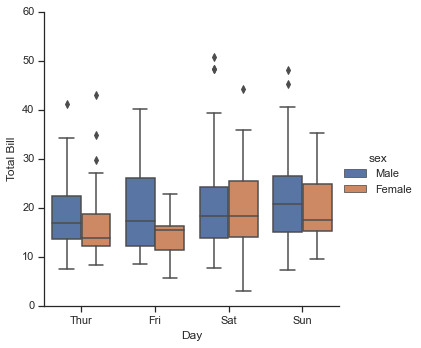

In [17]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('day', 'total_bill', 'sex', data=tips, kind="box") # factorplot is renamed to catplot
    g.set_axis_labels("Day", "Total Bill");

## Joint distributions

Similar to the pairplot we saw earlier, we can use 

    sns.jointplot 

to show the joint distribution between different datasets, along with the associated marginal distributions:

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


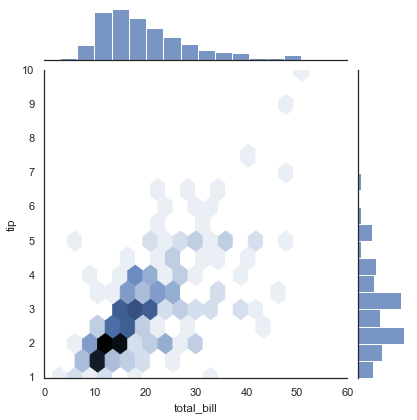

In [18]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip",data= tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


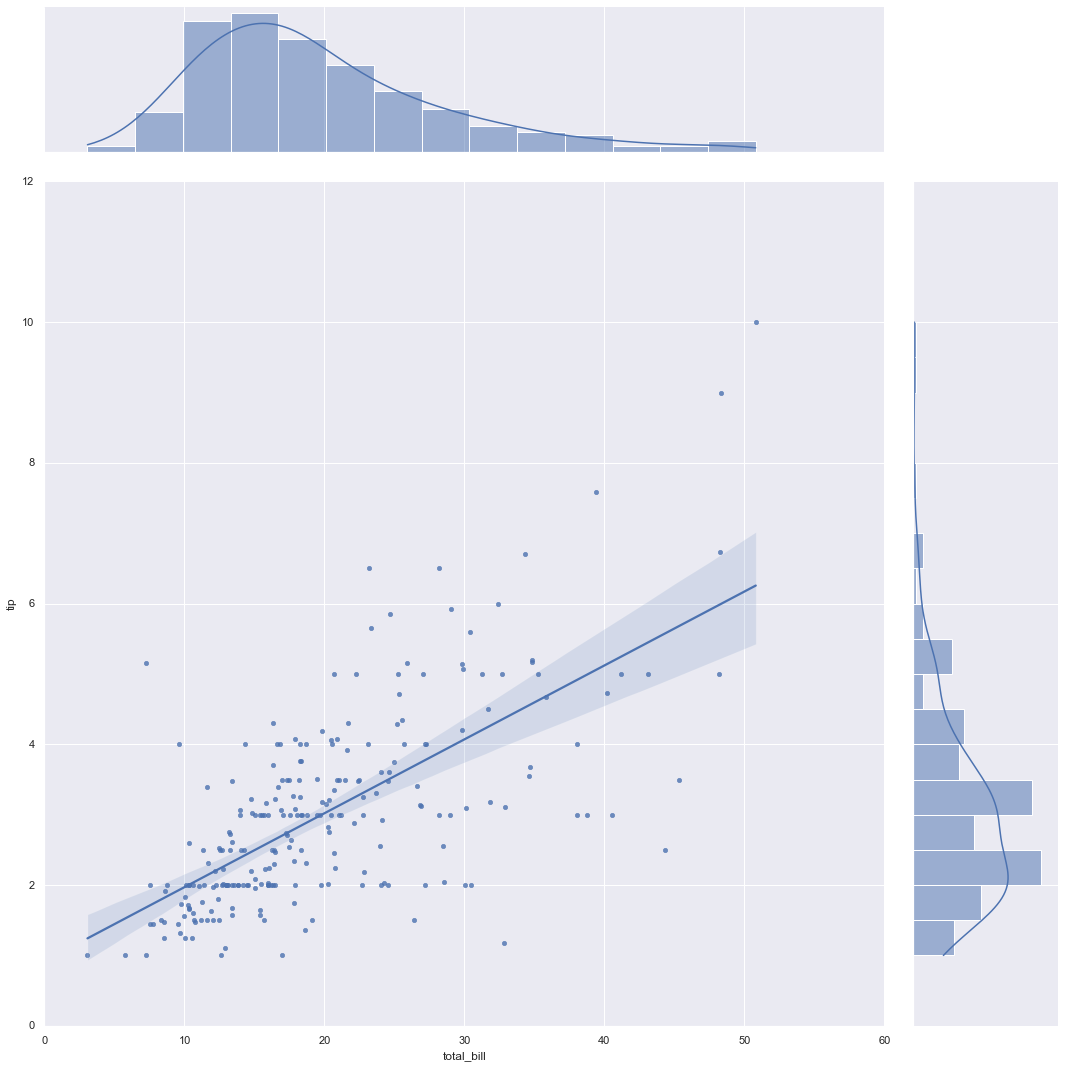

In [19]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg', height=15)

In [20]:
tips_corr = tips.corr()

In [21]:
tips_corr

,total_bill,tip,size,tip_pct
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_pct,-0.338624,0.342370,-0.142860,1.000000


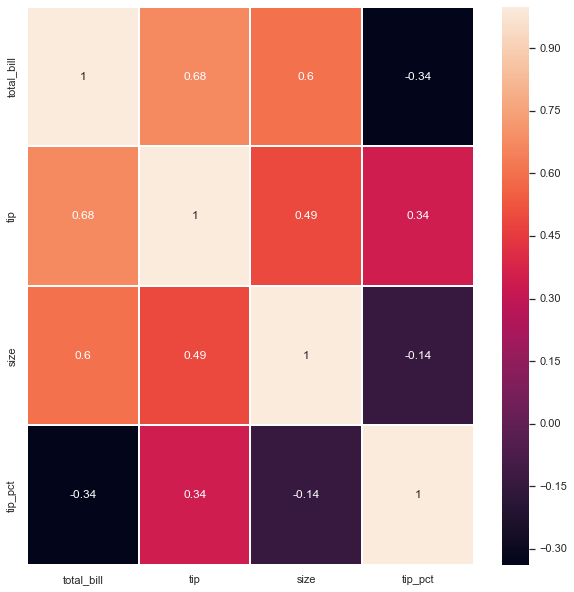

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(tips_corr, annot=True, linewidths=.1)
plt.show()

## Bar plots

Time series can be plotted using 

    sns.factorplot || sns.catplot
        
In the following example, we'll use the Planets data that we first saw in Aggregation and Grouping:

In [23]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [24]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


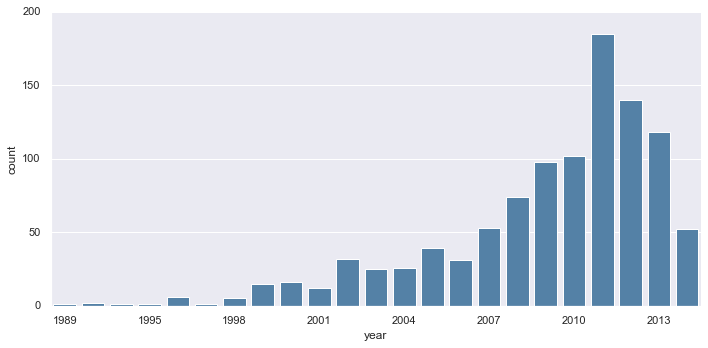

In [25]:
with sns.axes_style('darkgrid'):
    g = sns.catplot("year", data=planets, aspect=2, kind= "count", color='steelblue')
    g.set_xticklabels(step=3)

We can learn more by looking at the method of discovery of each of these planets:

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


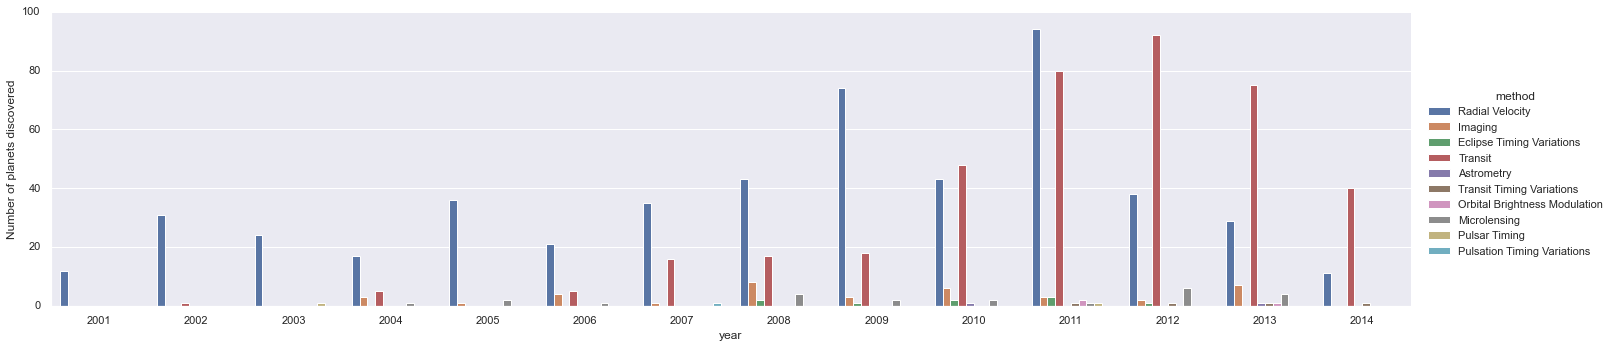

In [26]:
with sns.axes_style('darkgrid'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind="count", hue="method", order=range(2001, 2015))
    
    g.set_ylabels('Number of planets discovered')

For more information on plotting with Seaborn, see the Seaborn documentation, a tutorial, and the Seaborn gallery.

http://seaborn.pydata.org/ Seaborn documentation

http://seaborn.pydata.org/tutorial.htm tutorial

http://seaborn.pydata.org/examples/index.html Seaborn Gallery

# Example: Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.

We will start by downloading the data from the Web, and loading it into Pandas:

In [27]:
#!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [28]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns as Python strings (type object); 

we can see this by looking at the dtypes attribute of the DataFrame:

In [29]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Let's fix this by providing a converter for the times:

In [30]:
#def convert_time(s):
#    h, m, s = map(int, s.split(':'))
#    return pd.timedelta(hours=h, minutes=m, seconsd=s)

data = pd.read_csv('marathon-data.csv', converters={'split':pd.to_timedelta, 'final':pd.to_timedelta})

data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [31]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [32]:
data['split_sec'] = data['split'].astype(np.int64) / 1E9
data['final_sec'] = data['final'].astype(np.int64) / 1E9

data.head()

C:\Users\Nmtur\AppData\Local\Temp/ipykernel_7128/1081104039.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['split_sec'] = data['split'].astype(np.int64) / 1E9
C:\Users\Nmtur\AppData\Local\Temp/ipykernel_7128/1081104039.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['final_sec'] = data['final'].astype(np.int64) / 1E9


,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


To get an idea of what the data looks like, we can plot a 

    jointplot 

over the data:

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


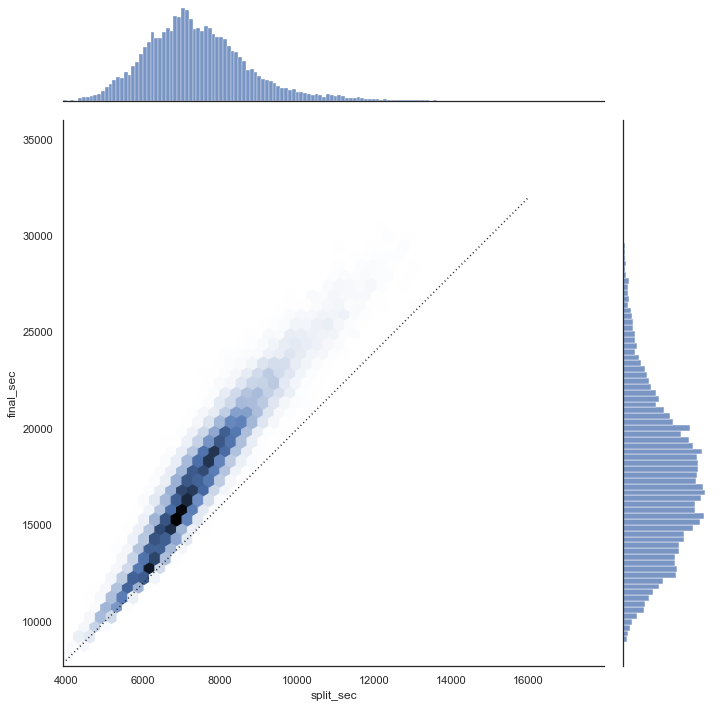

In [33]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex', height=10)
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')



The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:


In [34]:
data['split_frac']= 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction. Let's do a distribution plot of this split fraction:

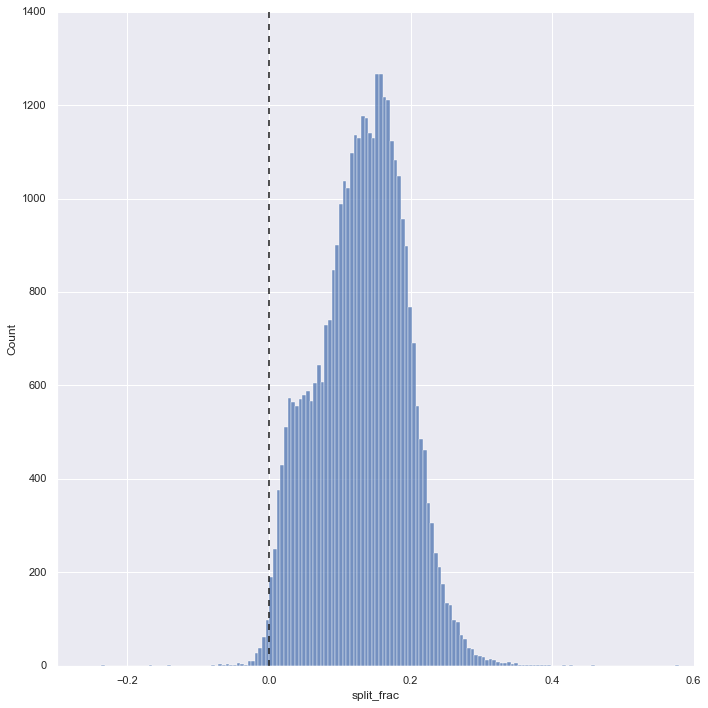

In [35]:
sns.displot(data['split_frac'], kde=False, height=10);
plt.axvline(0, color='k', linestyle="--");

In [36]:
sum(data.split_frac < 0)

251



Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a 

    pairgrid 
    
which draws plots of all these correlations:


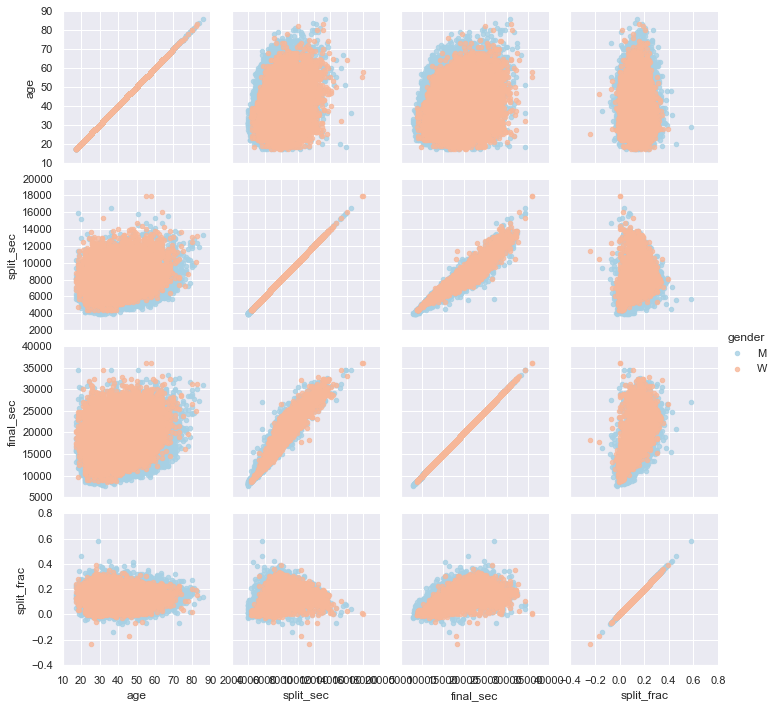

In [37]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')

g.map(plt.scatter, alpha=0.8)
g.add_legend();



It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time. (We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in "Customizing Ticks" can be used to adjust such things if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:


https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html Customizing Ticks

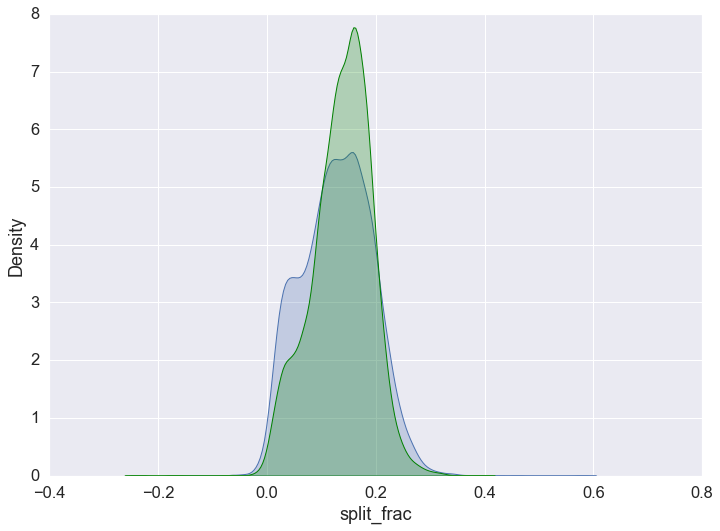

In [38]:
sns.set(font_scale=1.5)

sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True, color='green')
plt.xlabel('split_frac');



The interesting thing here is that there are many more men than women who are running close to an even split! This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a violin plot


C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='split_frac'>

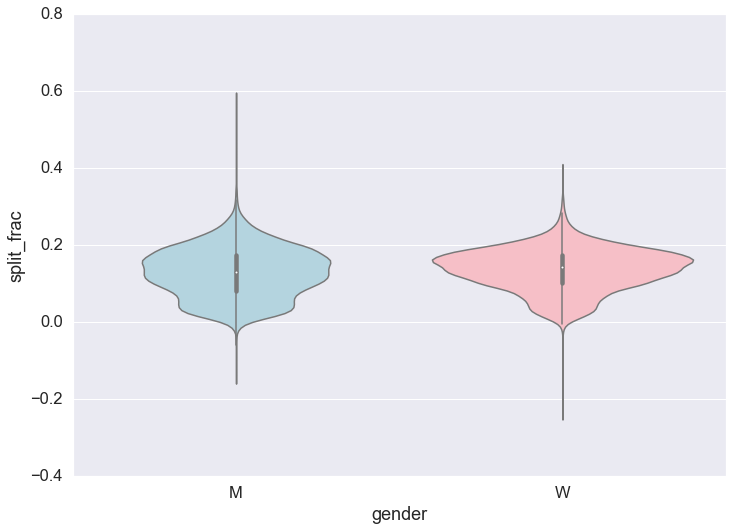

In [39]:
sns.violinplot("gender", "split_frac", data=data, palette=["lightblue", "lightpink"])

This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [40]:
data['age_dec'] = data.age.map(lambda age: 10 * (age// 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


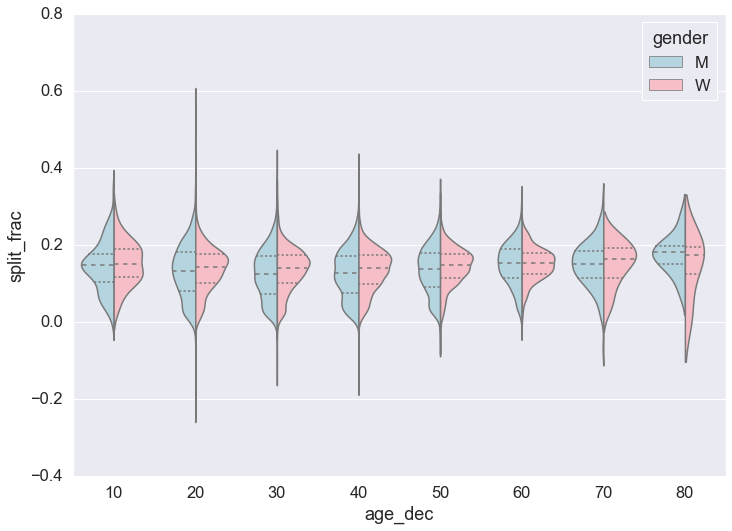

In [41]:
men = (data.gender== 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data, split=True,
                   inner="quartile", palette=["lightblue", "lightpink"]);